<h1><center>
    ECE 438: Digital Signal Processing with Applications<br/>
    Lab 2: Discrete-Time Systems<br/>
    <small>Date:</small><br/>
    <small>Section:<s/small><br>
</center></h1>

|Name |Signature |Time Spent outside of lab|
|:---:|:---:|:---:|
|Student Name #1 [---%]| | |
|Student Name #2 [---%]| | |

||Below Expectations| lacks in some respect|Meets all expectations|
|:---:|:---:|:---:|:---:|
|Completeness of the report||||
|Organization of the report
One-sided, with cover sheet, answers are in the same order as questions in the lab||||
|Ability to process given signals (20 pts)Import signal, plot signal, filter signal||||
|Understanding and ability to implement difference equations (60 pts))Draw system diagram, calculate impulse response, find inverse system answer ’discuss/explain’ questions||||
|Ability to test for linearity and time-invariance of systems (20 pts)Supporting plots with clear indication of the proof||||

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import IPython.display as ipd

In [2]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (16, 6)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

<h3 style="color:red;"><left>Exercise 2</left></h3>

**1. Draw the block diagram of the discrete-time differentiator as in Figure 1.**

<img src="differentiator.png">

**2. Apply the discrete-time differentiator to the signal $u[n]-u[n-(N+1)]$, with $N=10$, for $-10\leq n\leq20$, and plot the output. (This assumes a time step of $T=1$)**

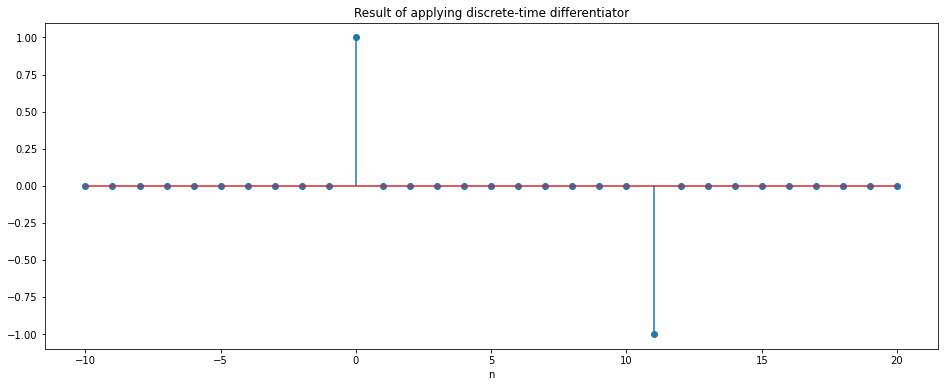

In [3]:
# write your code here
n = np.linspace(-10, 20, 31)
N = 10
T = 1

def x(n):
    return (n >= 0).astype(float) - (n - (N + 1) >= 0).astype(float)

x1 = x(n)  # x[n]
x2 = x(n - 1)  # x[n - 1]
y = (x1 - x2) / T

plt.stem(n, y)
plt.title("Result of applying discrete-time differentiator")
plt.xlabel(r"n")
plt.show()

**3. Draw the block diagram of the discrete-time integrator as in Figure 1.**

<img src="integrator.png">

**4. Apply the discrete-time integrator to the signal $u[n]-u[n-(N+1)]$, with $N=10$, for $-10\leq n\leq20$, and plot the output. (This assumes a time step of $T=1$)**

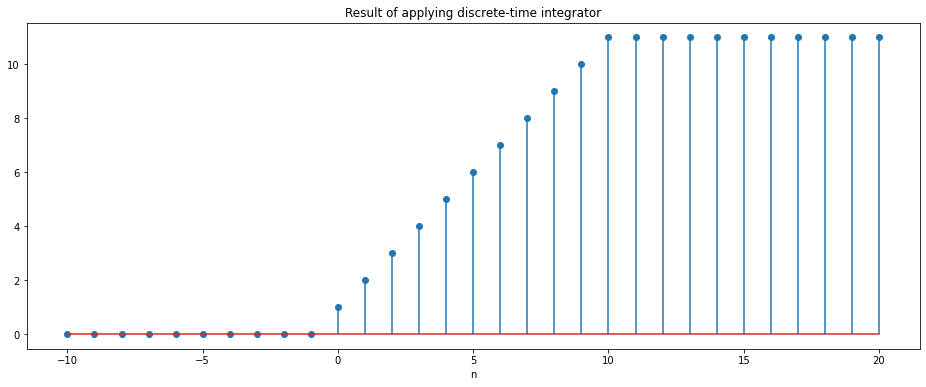

In [4]:
# write your code here
n = np.linspace(-10, 20, 31)
N = 10
T = 1

def x(n):
    return (n >= 0).astype(float) - (n - (N + 1) >= 0).astype(float)

x = x(n)
y = np.zeros(31)

y[0] = x[0]
for i in range(1, 31):
    y[i] = y[i - 1] + x[i] * T

plt.stem(n, y)
plt.title("Result of applying discrete-time integrator")
plt.xlabel(r"n")
plt.show()

**5. Use the discrete-time differentiator to numerically evaluate $\frac{d}{dt}x(t)$ of $x(t)=\sin(2\pi t)$ for $t\in[0,10]$, try $T=0.1$.**

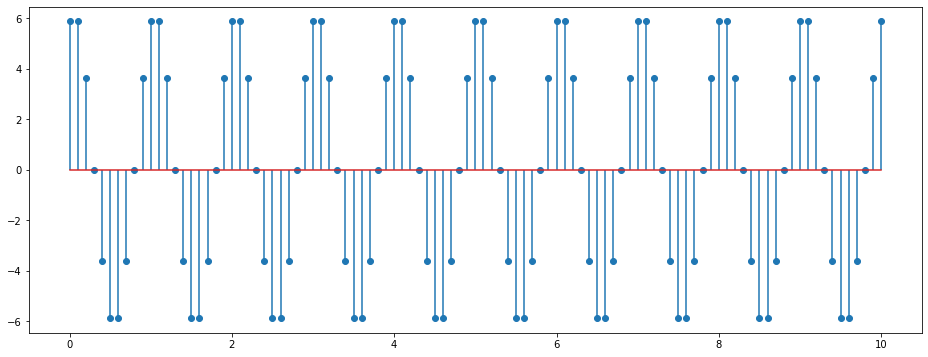

In [5]:
# write your code here
T = 0.1
t = np.arange(0, 10 + T, T)
n = np.arange(0, len(t))

def x(n):
    return np.sin(2 * np.pi * n * T)

x1 = x(n)
x2 = x(n - 1)

y1 = (x1 - x2) / T

plt.stem(t, y1)
plt.show()

**6. Use the discrete-time differentiator to numerically evaluate $\frac{d}{dt}x(t)$ of $x(t)=\sin(2\pi t)$ for $t\in[0,10]$, try $T=0.001$.**

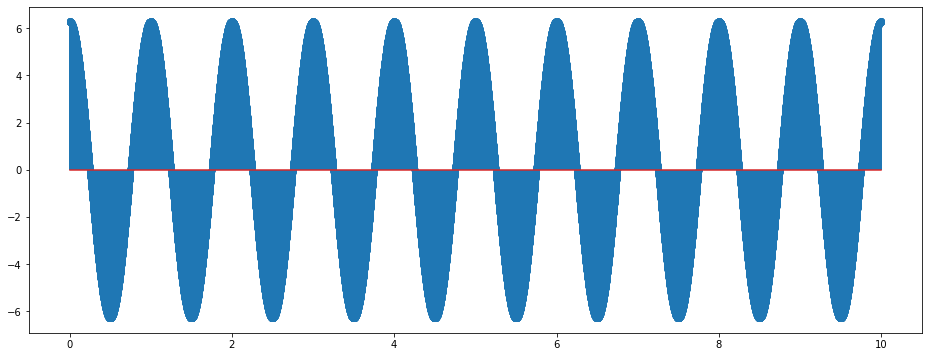

In [6]:
# write your code here
T = 0.001
t = np.arange(0, 10 + T, T)
n = np.arange(0, len(t))

def x(n):
    return np.sin(2 * np.pi * n * T)

x1 = x(n)
x2 = x(n - 1)

y1 = (x1 - x2) / T

plt.stem(t, y1)
plt.show()

**7. Compare the results in Q5 and Q6.**

write your answer here

<h3 style="color:red;"><left>Exercise 3</left></h3>

**1. For each of these five systems, do the following:**

* $S_1$
* $S_2$
* $S_1(S_2)$ (i.e., the series connection with $S_1$ following $S_2$)
* $S_2(S_1)$ (i.e., the series connection with $S_2$ following $S_1$)
* $S_1+S_2$

**i. Draw the system diagram (use only delays, multiplications, and additions as in Figure 1)**

your diagram goes here

**ii. Write code to implement each of these two filters ($S_1, S_2$) in the following functions using the following syntax**
```python
def S1(x):
    """
    Parameters
    ---
    x: the discrete-time signal
    
    Returns:
    ---
    y: the filtered signal
    """
    pass
```

and 
```python
def S2(x):
    """
    Parameters
    ---
    x: the discrete-time signal
    
    Returns:
    ---
    y: the filtered signal
    """
    pass
```

In [7]:
# write your code here
def S1(x):
    y = np.zeros(len(x))
    y[1:] = x[1:] - x[:-1]
    return y

def S2(x):
    y = np.zeros(len(x))
    for i in range(1, len(x)):
        y[i] = 0.5 * y[i - 1] + x[i]
    return y

**iii. Write code to calculate the impulse response of each of the five systems, and plot the impulse response of each of these five systems:**

In [8]:
# write your code here
n = np.linspace(-10, 10, 21)
delta = (n == 0).astype(float)

h1 = S1(delta)
h2 = S2(delta)
h3 = S1(S2(delta))
h4 = S2(S1(delta))
h5 = S1(delta) + S2(delta)

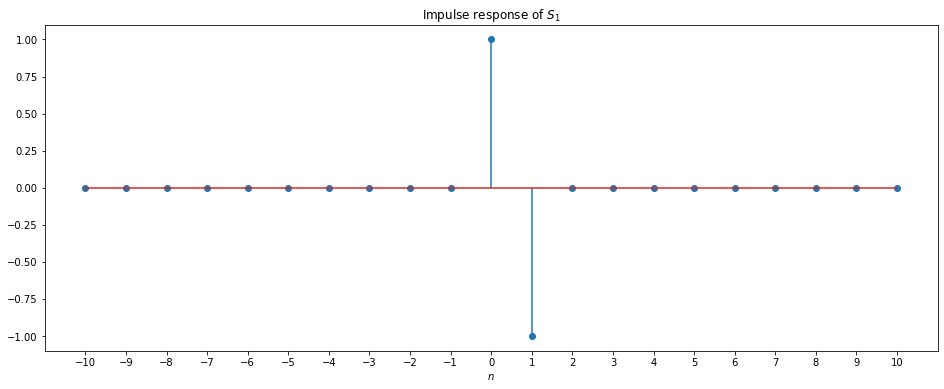

In [9]:
plt.stem(n, h1)
plt.xticks(n)
plt.title(r"Impulse response of $S_1$")
plt.xlabel(r"$n$")
plt.show()

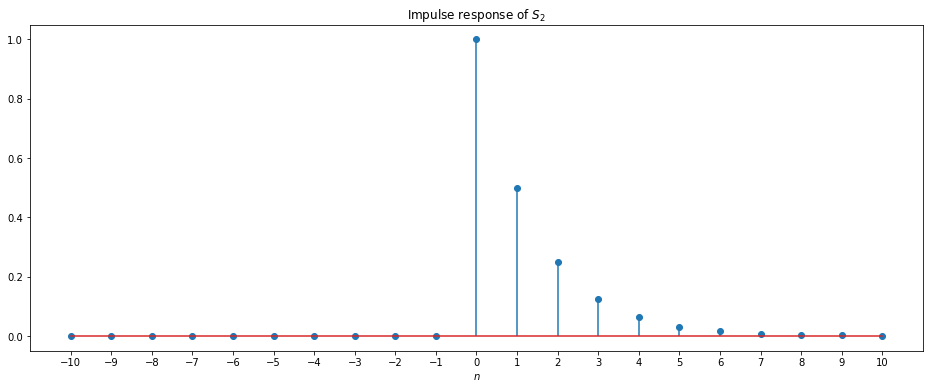

In [10]:
plt.stem(n, h2)
plt.xticks(n)
plt.title(r"Impulse response of $S_2$")
plt.xlabel(r"$n$")
plt.show()

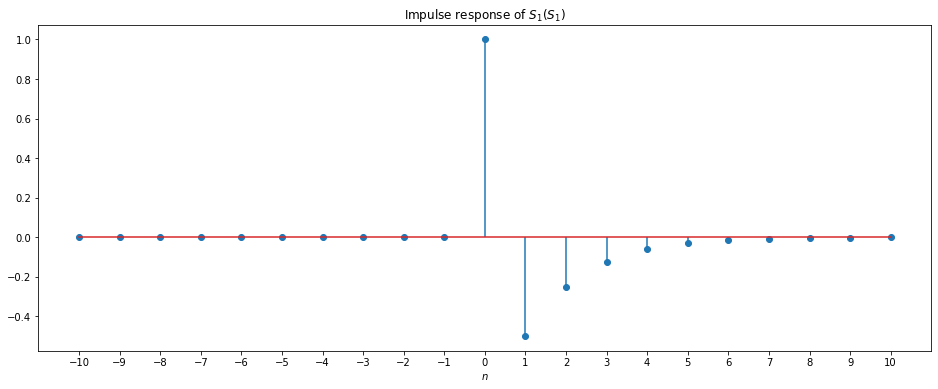

In [11]:
plt.stem(n, h3)
plt.xticks(n)
plt.title(r"Impulse response of $S_1(S_1)$")
plt.xlabel(r"$n$")
plt.show()

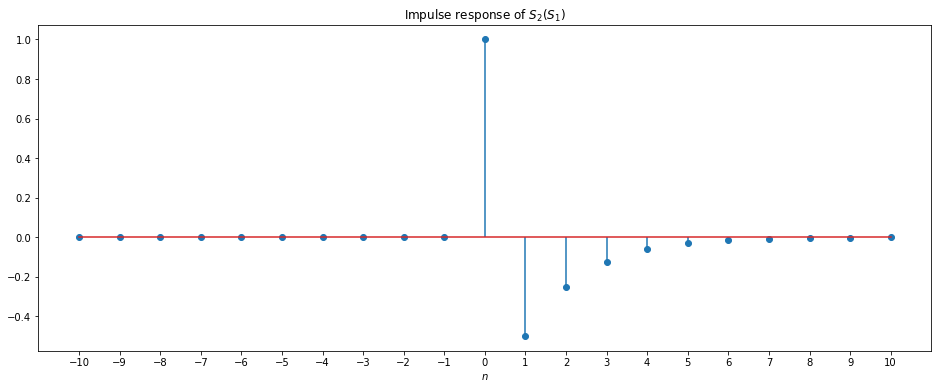

In [12]:
plt.stem(n, h4)
plt.xticks(n)
plt.title(r"Impulse response of $S_2(S_1)$")
plt.xlabel(r"$n$")
plt.show()

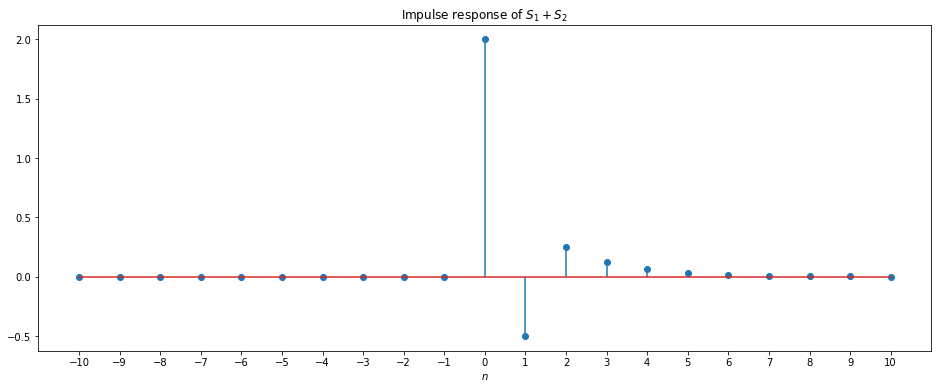

In [13]:
plt.stem(n, h5)
plt.xticks(n)
plt.title(r"Impulse response of $S_1 + S_2$")
plt.xlabel(r"$n$")
plt.show()

**2. Use the command ```audio, fs = sf.read("music.au")``` to load the file ```music.au``` into Python. The first variable ```audio``` is the signal, and the second variable ```fs``` is the sampling rate.**

In [14]:
# write your code here
audio, fs = sf.read("music.au")

**3. Play the audio file using the command `ipd.Audio(audio, rate=fs)`.**

In [15]:
# write your code here
ipd.Audio(audio, rate=fs)

**4. Next, filter the audio signal with each of the two systems $S_1$ and $S_2$ and listen to each of their outputs.**

In [16]:
# write your code here
audio1 = S1(audio)
ipd.Audio(audio1, rate=fs)

In [17]:
audio2 = S2(audio)
ipd.Audio(audio2, rate=fs)

**5. How do the filters change the sound of the audio signals? Explain your observations.**

write your answer here

<h3 style="color:red;"><left>Exercise 4</left></h3>

**1. Consider the system $y=S_2[x]$ from Section 3. Find a difference equation for a new system $y=S_3[x]$ such that $\delta=S_3[S_2[\delta]]$ where $\delta$ denotes the discrete-time impulse function $\delta(n)$. Since both systems $S_2$ and $S_3$ are LTI, the time-invariance and superposition properties can be used to obtain $x=S_3[S_2[x]]$ for *any* discrete-time signal $x$. We say that the systems $S_3$ and $S_2$ are inverse filters because they cancel out the effects of each other.**

**Hint:** The system $y=S_3[x]$ can be described by the difference equation

\begin{equation}
    y[n]=ax[n]+bx[n-1]
\end{equation}

where $a$ and $b$ are constants.

$y[n] = x[n] - \frac{1}{2}x[n-1]$

**2. Complete the Python function using the following syntax.**
```python
def S3(x):
    """
    Parameters
    ---
    x: the discrete-time signal
    
    Returns:
    ---
    y: the filtered signal
    """
    pass
```

In [18]:
# write your code here
def S3(x):
    y = np.zeros(len(x))
    y[1:] = x[1:] - 0.5 * x[:-1]
    return y

**3. Write code to plot the impulse response of both $S_3$ and $S_3[S_2[\delta]]$ below.**

In [19]:
# write your code here
n = np.linspace(-10, 10, 21)
delta = (n == 0).astype(float)

h1 = S3(delta)
h2 = S3(S2(delta))

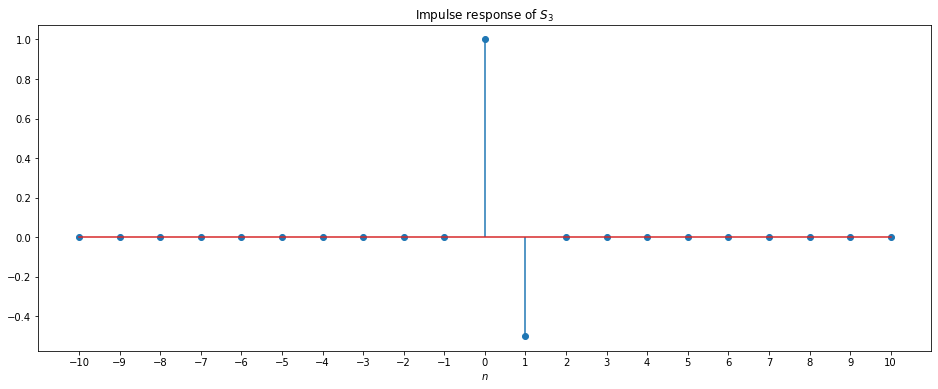

In [20]:
plt.stem(n, h1)
plt.xticks(n)
plt.title(r"Impulse response of $S_3$")
plt.xlabel(r"$n$")
plt.show()

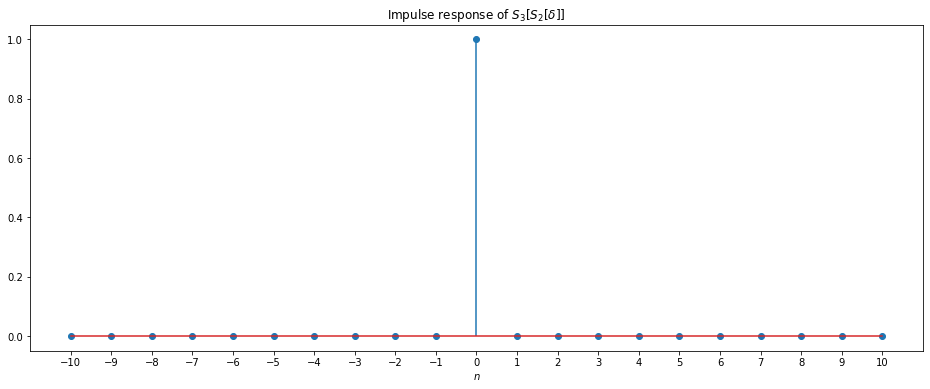

In [21]:
plt.stem(n, h2)
plt.xticks(n)
plt.title(r"Impulse response of $S_3[S_2[\delta]]$")
plt.xlabel(r"$n$")
plt.show()

<h3 style="color:red;"><left>Exercise 5</left></h3>

Often it is necessary to determine if a system is linear and/or time-invariant. If the inner workings of a system are not known, this task is impossible because the linearity and time-invariance properties must hold true for all possible input signals. However, it is possible to show that a system is non-linear or time-varying because only a single instance must be found where the properties are violated.

The code in the cell below is the synatx for the three imported black boxes, ```bbox1```, ```bbox2``` and ```bbox3```. All of them have the same syntax
```python
def bboxN(x):
    return y
```
where ```x``` and ```y``` are the input and the output signals, and ```N=1,2,3```. **Exactly one of these systems is non-linear, and exactly one of them is time-varying.** Your task is to find the non-linear system and the time-varying system.

**Hints:** 
* You should try a variety of input signals until you find a counter-example.
* When testing for time-invariance, you need to look at the responses to a signal and to its delayed version. Since all your signals in Python have a finite duration, you should be very careful about shifting signals. In particular, if you want to shift a signal $x$ by $M$ samples to the left, $x$ should start with at least $M$ zeros. If you want to shift $x$ by $M$ samples to the right, $x$ should end with at least $M$ zeros.
* When testing for linearity, you may find that simple inputs such as the unit impulse do not accomplish the task. In this case, you should try something more complicated like a sinusoid or a random signal generated with the ```x = np.random.rand(N)``` command, where ```N``` here is the length of the signal.

**1. Import the three bbboxes from the file ```bboxes.py```.**

In [22]:
# write your code here
from bboxes import bbox1, bbox2, bbox3

**2. Write code to plot input/output signal pairs that support your conclusions. Create multiple code cells if necessary.**

In [23]:
# write your code here
n = np.linspace(-20, 20, 41)
x1 = np.random.randn(41)
x2 = np.random.randn(41)

# linearity
a = 0.2
b = 1.3
y1 = bbox1(x1)
y2 = bbox1(x2)

s1 = a * y1 + b * y2
s2 = bbox1(a * x1 + b * x2)

# time invariance
x3 = np.zeros(41)
x4 = np.zeros(41)
x3[:21] = x1[:21]
x4[2:23] = x1[:21]
s3 = bbox1(x3)
s4 = bbox1(x4)

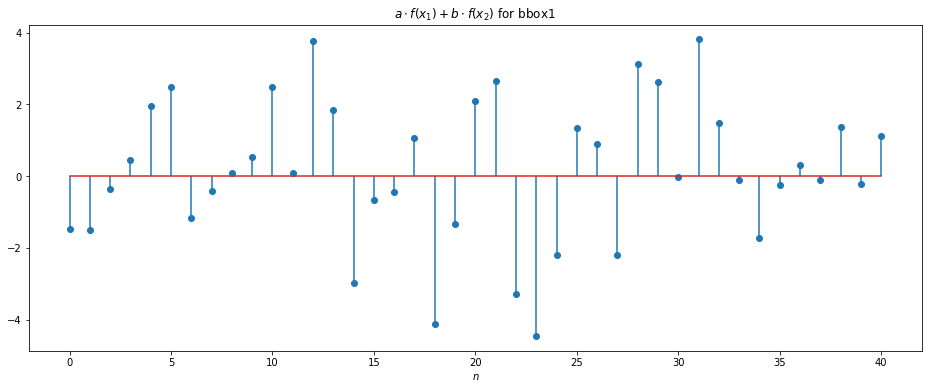

In [24]:
plt.stem(s1)
plt.title(r"$a\cdot f(x_1) + b\cdot f(x_2)$ for bbox1")
plt.xlabel(r"$n$")
plt.show()

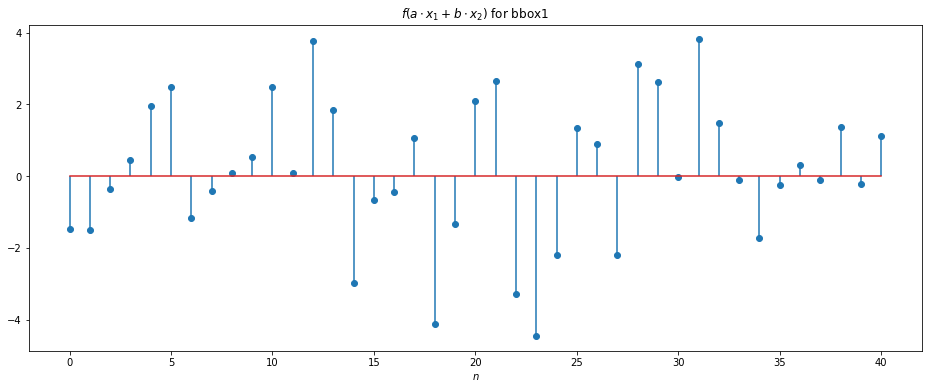

In [25]:
plt.stem(s2)
plt.title(r"$f(a \cdot x_1 + b \cdot x_2)$ for bbox1")
plt.xlabel(r"$n$")
plt.show()

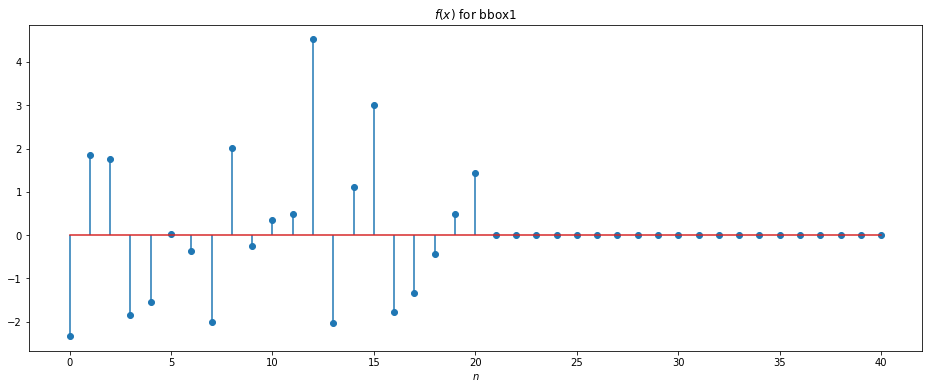

In [26]:
plt.stem(s3)
plt.title(r"$f(x)$ for bbox1")
plt.xlabel(r"$n$")
plt.show()

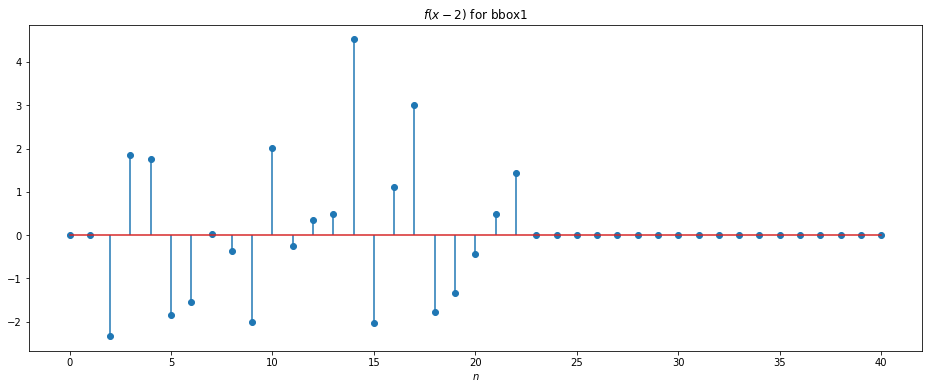

In [27]:
plt.stem(s4)
plt.title(r"$f(x - 2)$ for bbox1")
plt.xlabel(r"$n$")
plt.show()

In [28]:
# write your code here
n = np.linspace(-20, 20, 41)
x1 = np.random.randn(41)
x2 = np.random.randn(41)

# linearity
a = 0.2
b = 1.3
y1 = bbox2(x1)
y2 = bbox2(x2)

s1 = a * y1 + b * y2
s2 = bbox2(a * x1 + b * x2)

# time invariance
x3 = np.zeros(41)
x4 = np.zeros(41)
x3[:21] = x1[:21]
x4[2:23] = x1[:21]
s3 = bbox2(x3)
s4 = bbox2(x4)

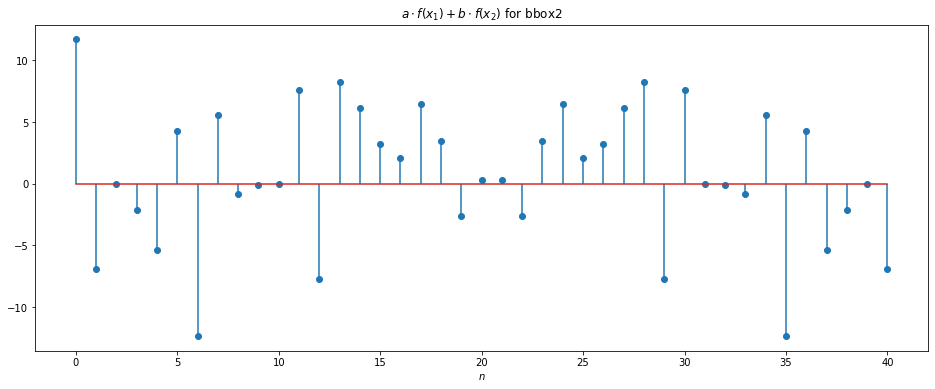

In [29]:
plt.stem(s1)
plt.title(r"$a\cdot f(x_1) + b\cdot f(x_2)$ for bbox2")
plt.xlabel(r"$n$")
plt.show()

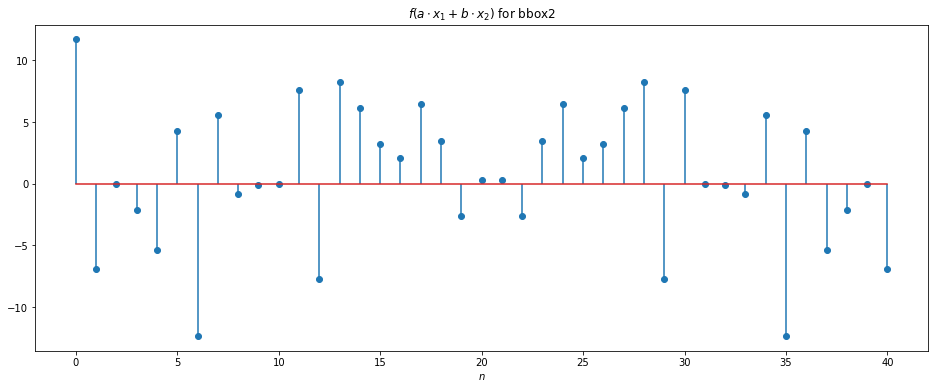

In [30]:
plt.stem(s2)
plt.title(r"$f(a \cdot x_1 + b \cdot x_2)$ for bbox2")
plt.xlabel(r"$n$")
plt.show()

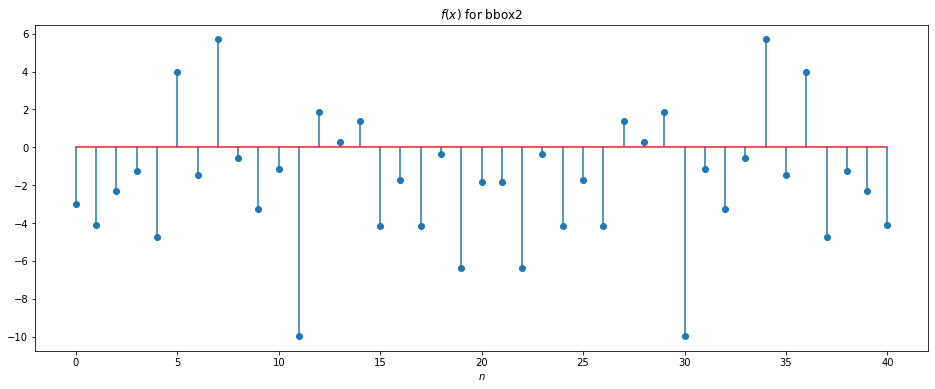

In [31]:
plt.stem(s3)
plt.title(r"$f(x)$ for bbox2")
plt.xlabel(r"$n$")
plt.show()

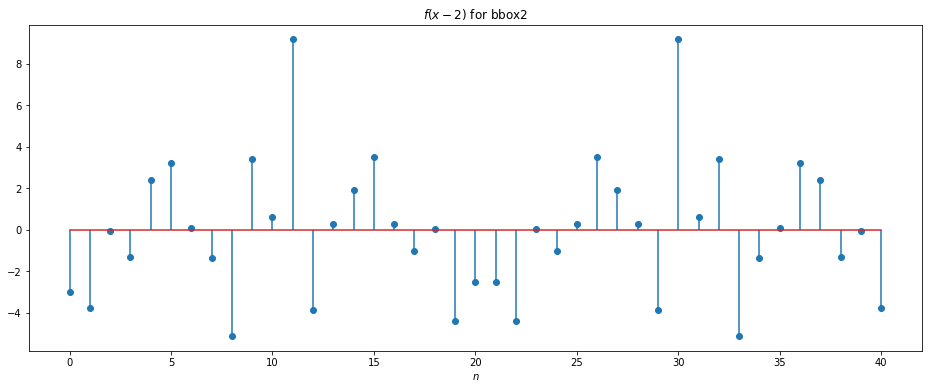

In [32]:
plt.stem(s4)
plt.title(r"$f(x - 2)$ for bbox2")
plt.xlabel(r"$n$")
plt.show()

In [33]:
# write your code here
n = np.linspace(-20, 20, 41)
x1 = np.random.randn(41)
x2 = np.random.randn(41)

# linearity
a = 0.2
b = 1.3
y1 = bbox3(x1)
y2 = bbox3(x2)

s1 = a * y1 + b * y2
s2 = bbox3(a * x1 + b * x2)

# time invariance
x3 = np.zeros(41)
x4 = np.zeros(41)
x3[:21] = x1[:21]
x4[2:23] = x1[:21]
s3 = bbox3(x3)
s4 = bbox3(x4)

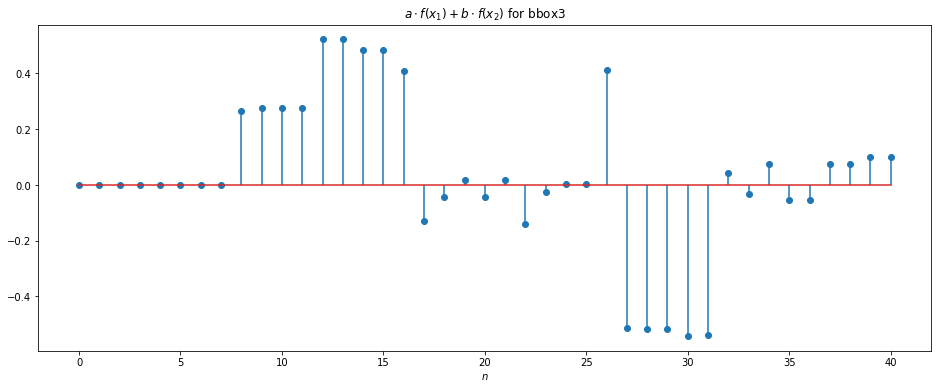

In [34]:
plt.stem(s1)
plt.title(r"$a\cdot f(x_1) + b\cdot f(x_2)$ for bbox3")
plt.xlabel(r"$n$")
plt.show()

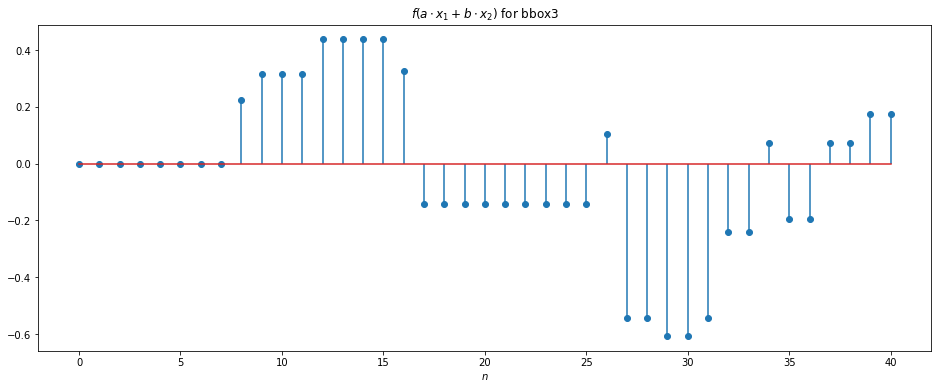

In [35]:
plt.stem(s2)
plt.title(r"$f(a \cdot x_1 + b \cdot x_2)$ for bbox3")
plt.xlabel(r"$n$")
plt.show()

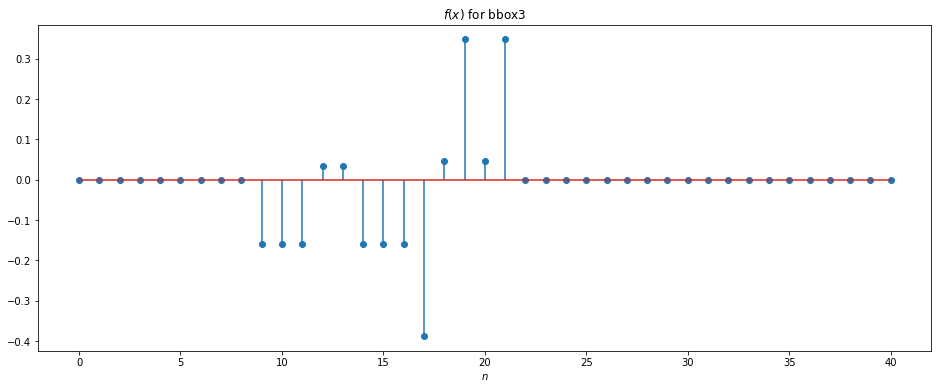

In [36]:
plt.stem(s3)
plt.title(r"$f(x)$ for bbox3")
plt.xlabel(r"$n$")
plt.show()

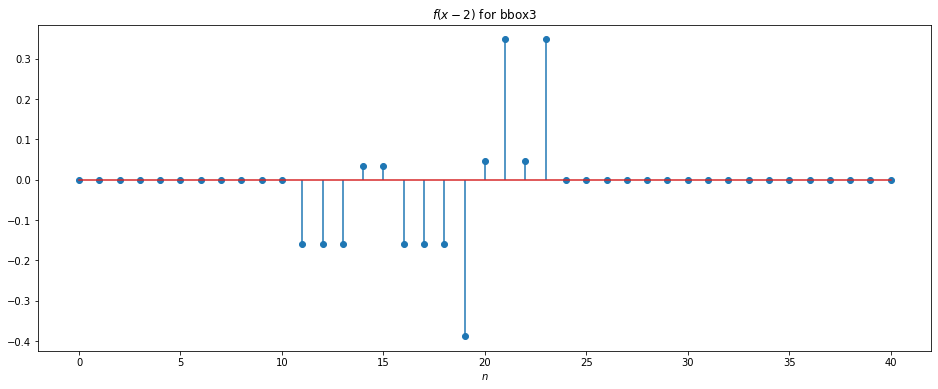

In [37]:
plt.stem(s4)
plt.title(r"$f(x - 2)$ for bbox3")
plt.xlabel(r"$n$")
plt.show()

**2. State which system is non-linear and which system is time-varying.**


`bbox2` is time-varying and `bbox3` is non-linear.

**3. Explain how the plots support your conclusion.**

write your answer here

<h3 style="color:red;"><left>Exercise 6.1</left></h3>

**For each of these three methods:**

**1. Write a difference equation**

$y[n] = \frac{1}{3}\left(x[n]+x[n-1]+x[n-2]\right)$

$y[n]=0.6y[n-1]+0.4x[n]$

$y[n]=y[n-1]+\frac{1}{3}\left(x[n]-x[n-3]\right)$

**2. Draw a system diagram**

insert your diagram here

**3. Calculate the impulse response**

write your answer here

**4. Explain why methods (5) and (7) are known as moving average.**

write your answer here

<h3 style="color:red;"><left>Exercise 6.2</left></h3>

Load the file ```stockrates.npy``` into Python. This file contains a vector of daily stock market exchange rates for a publicly-traded stock.

Apply filters (6) and (7) to smooth the stock values. When you apply filter (6), you will need to initialize the value of *averagevalue(yesterday)*. Use an initial value of $0$. Similarly, in filter (7), set the initial values of the *value* vector to $0$ (for the days prior to the start of data collection).

**Note: You will need the following code to load data that is stored in a `.npy` file.**

In [38]:
rate = np.load("stockrates.npy")

**1. Plot the original stock values.**

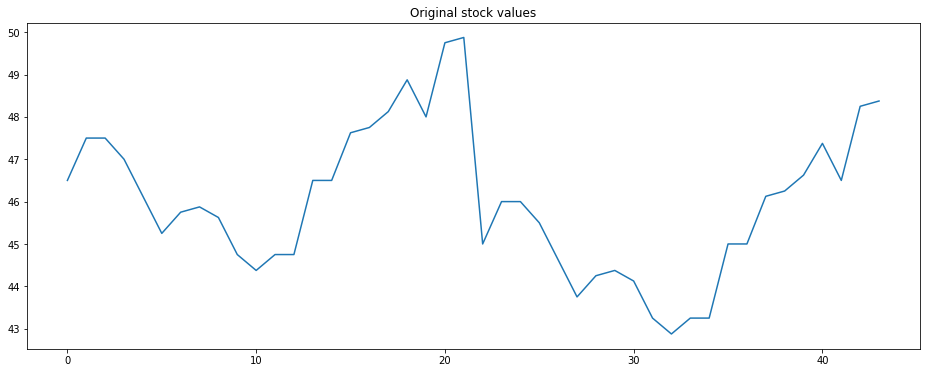

In [39]:
# write your code here
plt.plot(rate)
plt.title("Original stock values")
# plt.ylim([0, 52])
plt.show()

**2. Plot the result of filtering with (6).**

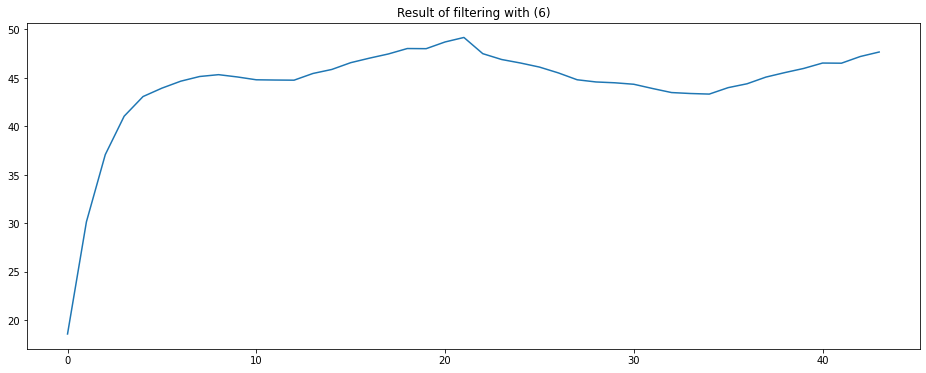

In [40]:
# write your code here
def S(x):
    y = np.zeros(len(x))
    y[0] = 0.4 * x[0]
    for i in range(1, len(x)):
        y[i] = 0.6 * y[i - 1] + 0.4 * x[i]
    return y


y = S(rate)
plt.plot(y)
plt.title("Result of filtering with (6)")
plt.show()

**3. Plot the result of filtering with (7).**

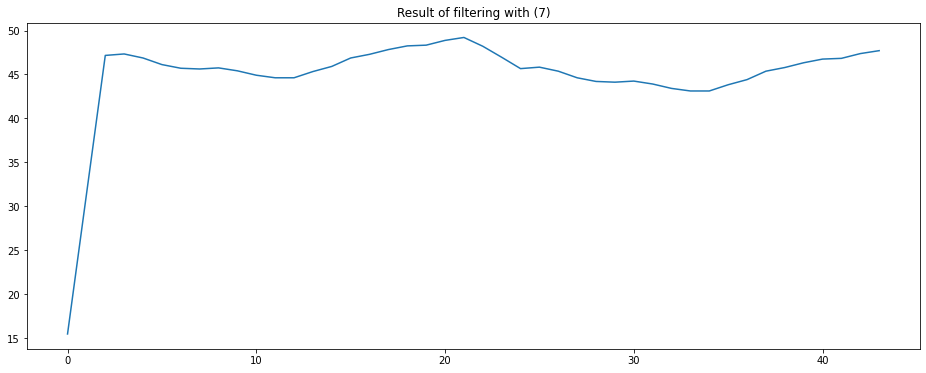

In [41]:
# write your code here
def S(x):
    y = np.zeros(len(x))
    y[0] = 1 / 3 * x[0]
    y[1] = y[0] + 1 / 3 * (x[1])
    y[2] = y[1] + 1 / 3 * (x[2])
    for i in range(3, len(x)):
        y[i] = y[i - 1] + 1 / 3 * (x[i] - x[i - 3])
    return y


y = S(rate)
plt.plot(y)
plt.title("Result of filtering with (7)")
plt.show()

**4. Discuss the advantages and disadvantages of the two filters (6) and (7). Can you suggest a better method for initializing the filter outputs?**.

write your answer here